In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
NUM_TRIALS = 2000
EPS = 0.1
BANDIT_PROBABILITIES = [3, 6, 10]

In [ ]:
class Bandit:
    def __init__(self, p, first_reward):
        # p: the win rate
        self.p = p
        self.p_estimate = first_reward
        self.N = 1. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.normal(self.p,np.sqrt(2),1)

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [ ]:
##e-greedy
def experiment():
    bandits = [Bandit(p,0) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        best_win = np.argmax(np.array([b.p_estimate for b in bandits]))
        if np.random.random() < EPS:
          best_win = np.random.randint(0,np.shape(BANDIT_PROBABILITIES)[0])

        x = bandits[best_win].pull()
        rewards[i] = x
        bandits[best_win].update(x)


    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 14])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

mean estimate: [2.74706471]
mean estimate: [5.8842985]
mean estimate: [9.98654748]
total reward earned: 19186.449906840102
overall win rate: 9.593224953420052
num times selected each bandit: [72.0, 72.0, 1859.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


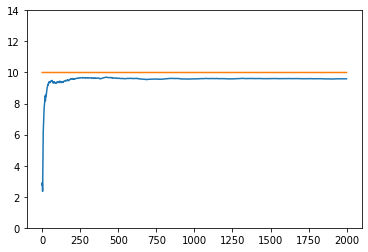

In [ ]:
experiment()

In [ ]:
##UBC
def experiment():
    bandits = [Bandit(p,0) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    c = 3
    for i in range(NUM_TRIALS):
        check = [x + c*np.sqrt(np.log(i+1))/y for (x, y) in zip([b.p_estimate for b in bandits], [b.N for b in bandits])] 
        best_win = np.argmax(check)
        if np.random.random() < -1 * EPS:
          best_win = np.random.randint(0,np.shape(BANDIT_PROBABILITIES)[0])

        x = bandits[best_win].pull()
        rewards[i] = x
        bandits[best_win].update(x)


    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 14])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


mean estimate: [2.34277673]
mean estimate: [1.75155281]
mean estimate: [9.94244862]
total reward earned: 19867.94410649401
overall win rate: 9.933972053247006
num times selected each bandit: [4.0, 2.0, 1997.0]


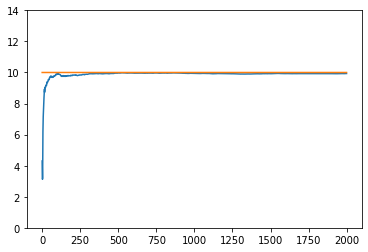

In [ ]:
experiment()

In [ ]:
np.shape(BANDIT_PROBABILITIES)[0]


3

In [ ]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
check = np.array([b.p_estimate for b in bandits]) + np.sqrt(np.log(3+1))/np.sqrt(np.array([b.N for b in bandits]))

In [ ]:
best_win = np.argmax(check)
best_win

0